In [213]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 
import networkx as nx
np.random.seed(0)

In [214]:
# Fall 2017 
# honors0 - Full Transparency 
# unal0- No Transparency
# unal1 - Solution Transparency 
# unal2 - Full Transparency


In [215]:
df = pd.read_csv("all_score_phase4_update.csv")
df1 = df.dropna()
df1.head(5)

,username,hack id,repo name,time,climate dataset,extra dataset used,extra dataset list,google api,location,using JS,...,combined_infovis_raw,combined_infovis_norm,combined_infovis_per,novelty,novelty_normal,novelty_per,novelty_detail,total_raw,total_norm,total_norm_per
0,mdecloedt,honors0,IH-Project-2017-mdecloedt_webapp_phase4,Fri Nov 17 12:12:48 2017,1,2,"Zillow Home Value Searching API, Required Weat...",1,1,1,...,10,43.478261,96.3%,8,1.777778,77.78%,"3.0,1.0,1.0,;3.0,0.0,0.0,;",27,272.130526,96.3%
1,Jordan-Loeser,honors0,IH-Project-2017-Jordan-Loeser_webapp_phase4,Fri Nov 17 12:12:48 2017,1,2,"Zillow Home Value Searching API, Required Weat...",1,1,1,...,7,30.434783,92.59%,8,1.777778,77.78%,"3.0,1.0,1.0,;3.0,0.0,0.0,;",24,251.475010,92.59%
2,LukasMMarinovic,honors0,IH-Project-2017-LukasMMarinovic_webapp_phase4,Fri Nov 17 12:12:48 2017,1,1,"Required Weather API,",1,0,1,...,3,13.043478,25.93%,3,0.666667,29.63%,"3.0,0.0,0.0,;",13,193.074693,25.93%
3,whipplem123,honors0,IH-Project-2017-whipplem123_webapp_phase4,Fri Nov 17 12:12:48 2017,0,1,"Zillow Home Value Searching API,",1,1,1,...,3,13.043478,25.93%,3,0.666667,29.63%,"3.0,0.0,0.0,;",15,212.437076,51.85%
5,jmamaril25,honors0,IH-Project-2017-jmamaril25_webapp_phase4,Fri Nov 17 12:12:48 2017,1,8,"Zillow Home Value Searching API, Required Weat...",1,1,1,...,5,21.739130,81.48%,27,6.000000,96.3%,"3.0,0.0,0.0,;3.0,1.0,1.0,;1.0,1.0,1.0,;3.0,0.0...",41,239.093645,88.89%


In [216]:
G_cool = pd.read_csv('Scores and Project Clicks Fall 2017.csv')
G_df = G_cool[G_cool['clicker_username'] != 'RCODI']
G_df

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
75,10/9/17,8:07 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase1,aldiazve,aldiazve@unal.edu.co,uxjudges3,uxjudges3@gmail.com
76,10/9/17,8:07 PM,NaN,show-code,/users/aldiazve/projects/ironhackstutorial/edi...,NaN,phase1,aldiazve,aldiazve@unal.edu.co,uxjudges3,uxjudges3@gmail.com
77,10/9/17,8:07 PM,NaN,open-file,http://www.ironhacks.com/users/aldiazve/projec...,index.html,phase1,aldiazve,aldiazve@unal.edu.co,uxjudges3,uxjudges3@gmail.com
78,10/9/17,8:07 PM,NaN,show-view,/users/aldiazve/projects/ironhackstutorial/pre...,NaN,phase1,aldiazve,aldiazve@unal.edu.co,uxjudges3,uxjudges3@gmail.com
79,10/9/17,8:07 PM,NaN,show-view,/users/aldiazve/projects/ironhackstutorial/pre...,NaN,phase1,aldiazve,aldiazve@unal.edu.co,uxjudges3,uxjudges3@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...
21942,11/22/17,9:31 AM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,map.js,phase5,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co
21943,11/22/17,9:31 AM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,moreNy.js,phase5,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co
21944,11/22/17,9:32 AM,61.085,view-project-time,/users/Anvido/projects/webapp_phase4,NaN,phase5,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co
21945,11/22/17,11:43 AM,NaN,show-view,/users/cglaitong/projects/webapp_phase4/previe...,NaN,phase5,cglaitong,cglaitong@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co


# Phase 1 Clicks Analysis for honors0 ( Full Transprency ), UNAL1 ( Solution Transparency ), UNAL2 ( Full Transparency )

In [217]:
phase1 = G_df.loc[G_df['phase'] == 'phase4']
phase1

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
13059,11/13/17,11:38 PM,NaN,score-click,NaN,NaN,phase4,trickyjuggler,ejjimenezc@unal.edu.co,ironhacktech2,ironhacktech2@gmail.com
13060,11/13/17,11:38 PM,NaN,score-click,NaN,NaN,phase4,serbatero,sisanchezp@unal.edu.co,ironhacktech2,ironhacktech2@gmail.com
13061,11/13/17,11:38 PM,NaN,score-click,NaN,NaN,phase4,StevenEsmar,stespinosama@unal.edu.co,ironhacktech2,ironhacktech2@gmail.com
13062,11/13/17,11:38 PM,NaN,score-click,NaN,NaN,phase4,pahigueraf,pahigueraf@unal.edu.co,ironhacktech2,ironhacktech2@gmail.com
13063,11/13/17,11:38 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase4,pahigueraf,pahigueraf@unal.edu.co,ironhacktech2,ironhacktech2@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...
17746,11/18/17,11:57 PM,NaN,open-file,http://www.ironhacks.com/users/GeoffYart/proje...,index.js,phase4,GeoffYart,nathanfei123@gmail.com,jmamaril25,jmamaril25@gmail.com
17747,11/18/17,11:57 PM,21.248,view-project-time,/users/GeoffYart/projects/webapp_phase4,NaN,phase4,GeoffYart,nathanfei123@gmail.com,jmamaril25,jmamaril25@gmail.com
17748,11/18/17,11:57 PM,NaN,score-click,NaN,NaN,phase4,Jordan-Loeser,jordlo@comcast.net,jmamaril25,jmamaril25@gmail.com
17749,11/18/17,11:57 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase4,Jordan-Loeser,jordlo@comcast.net,jmamaril25,jmamaril25@gmail.com


In [218]:
df = pd.read_csv("all_score_phase4_update.csv")
df1.head(5)

,username,hack id,repo name,time,climate dataset,extra dataset used,extra dataset list,google api,location,using JS,...,combined_infovis_raw,combined_infovis_norm,combined_infovis_per,novelty,novelty_normal,novelty_per,novelty_detail,total_raw,total_norm,total_norm_per
0,mdecloedt,honors0,IH-Project-2017-mdecloedt_webapp_phase4,Fri Nov 17 12:12:48 2017,1,2,"Zillow Home Value Searching API, Required Weat...",1,1,1,...,10,43.478261,96.3%,8,1.777778,77.78%,"3.0,1.0,1.0,;3.0,0.0,0.0,;",27,272.130526,96.3%
1,Jordan-Loeser,honors0,IH-Project-2017-Jordan-Loeser_webapp_phase4,Fri Nov 17 12:12:48 2017,1,2,"Zillow Home Value Searching API, Required Weat...",1,1,1,...,7,30.434783,92.59%,8,1.777778,77.78%,"3.0,1.0,1.0,;3.0,0.0,0.0,;",24,251.475010,92.59%
2,LukasMMarinovic,honors0,IH-Project-2017-LukasMMarinovic_webapp_phase4,Fri Nov 17 12:12:48 2017,1,1,"Required Weather API,",1,0,1,...,3,13.043478,25.93%,3,0.666667,29.63%,"3.0,0.0,0.0,;",13,193.074693,25.93%
3,whipplem123,honors0,IH-Project-2017-whipplem123_webapp_phase4,Fri Nov 17 12:12:48 2017,0,1,"Zillow Home Value Searching API,",1,1,1,...,3,13.043478,25.93%,3,0.666667,29.63%,"3.0,0.0,0.0,;",15,212.437076,51.85%
5,jmamaril25,honors0,IH-Project-2017-jmamaril25_webapp_phase4,Fri Nov 17 12:12:48 2017,1,8,"Zillow Home Value Searching API, Required Weat...",1,1,1,...,5,21.739130,81.48%,27,6.000000,96.3%,"3.0,0.0,0.0,;3.0,1.0,1.0,;1.0,1.0,1.0,;3.0,0.0...",41,239.093645,88.89%


In [219]:
df_new = df1.loc[df1['hack id'] == 'honors0']
#print(df_new['username'].tolist())
#print(df_new)
df_revised = phase1.loc[phase1.clicker_username.isin(df_new['username'])]
df_revised

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
13076,11/13/17,11:39 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase4,nbraunec,noah.braunecker@gmail.com,ko68,ko68@purdue.edu
13077,11/13/17,11:39 PM,NaN,show-view,/users/nbraunec/projects/webapp_phase3/preview...,NaN,phase4,nbraunec,noah.braunecker@gmail.com,ko68,ko68@purdue.edu
13078,11/13/17,11:39 PM,NaN,show-view,/users/nbraunec/projects/webapp_phase3/preview...,NaN,phase4,nbraunec,noah.braunecker@gmail.com,ko68,ko68@purdue.edu
13079,11/13/17,11:39 PM,7.351,view-project-time,/users/nbraunec/projects/webapp_phase3,NaN,phase4,nbraunec,noah.braunecker@gmail.com,ko68,ko68@purdue.edu
13081,11/13/17,11:39 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase4,Jordan-Loeser,jordlo@comcast.net,ko68,ko68@purdue.edu
...,...,...,...,...,...,...,...,...,...,...,...
17746,11/18/17,11:57 PM,NaN,open-file,http://www.ironhacks.com/users/GeoffYart/proje...,index.js,phase4,GeoffYart,nathanfei123@gmail.com,jmamaril25,jmamaril25@gmail.com
17747,11/18/17,11:57 PM,21.248,view-project-time,/users/GeoffYart/projects/webapp_phase4,NaN,phase4,GeoffYart,nathanfei123@gmail.com,jmamaril25,jmamaril25@gmail.com
17748,11/18/17,11:57 PM,NaN,score-click,NaN,NaN,phase4,Jordan-Loeser,jordlo@comcast.net,jmamaril25,jmamaril25@gmail.com
17749,11/18/17,11:57 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase4,Jordan-Loeser,jordlo@comcast.net,jmamaril25,jmamaril25@gmail.com


# Honors0 Phase1 Clicks Analysis ( Full Transparency )

In [220]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

            index  click_times
0            ko68          187
1          bzin22           97
2      jmamaril25          262
3     viswapurdue          239
4         zhao744          221
5         matson3           99
6       mdecloedt          349
7         gshowal          167
8        nbraunec           57
9     littlex2015          194
10  Jordan-Loeser           83
11      GeoffYart           52
12         AkaGar           28
13    whipplem123          105
14        ecottle          186
15    noah-curran           10


In [221]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_raw'])
print(df_cool)

            index  click_times  match
0            ko68          187     20
1          bzin22           97     23
2      jmamaril25          262     41
3     viswapurdue          239     16
4         zhao744          221     16
5         matson3           99     14
6       mdecloedt          349     27
7         gshowal          167     15
8        nbraunec           57     26
9     littlex2015          194     20
10  Jordan-Loeser           83     24
11      GeoffYart           52     30
12         AkaGar           28     14
13    whipplem123          105     15
14        ecottle          186     15
15    noah-curran           10     16


Text(0.5, 1.0, 'Group: honors0 - Full Transparency')

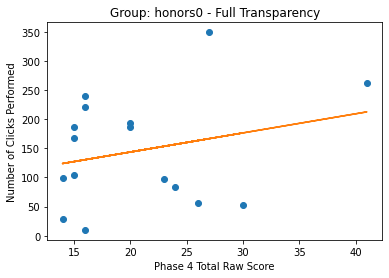

In [223]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 4 Total Raw Score')
plt.ylabel('Number of Clicks Performed')
plt.title('Group: honors0 - Full Transparency')

In [224]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['hacker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

              index  click_times
0          nbraunec          178
1     Jordan-Loeser          142
2           zhao744           98
3        jmamaril25          383
4         mdecloedt          238
5             RCODI          158
6              ko68           99
7        laurenjank           45
8       noah-curran           46
9           lennwgs           32
10       sanjitsama           59
11           bzin22           44
12      whipplem123           46
13      viswapurdue           33
14        snugghash           30
15  LukasMMarinovic           56
16       CampbellC2           55
17     jmhunter4711           18
18        GeoffYart           49
19           SionHu           32
20         aclipfel           38
21      Ilyumzhinov           20
22      laurarotger           28
23          shivans           24
24          ecottle           57
25      littlex2015           69
26           AkaGar           50
27            hihms           45
28          matson3          164


In [225]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_raw'])
df_cool['match'] = df_cool['match'].fillna(0)
print(df_cool)

              index  click_times  match
0          nbraunec          178   26.0
1     Jordan-Loeser          142   24.0
2           zhao744           98   16.0
3        jmamaril25          383   41.0
4         mdecloedt          238   27.0
5             RCODI          158    0.0
6              ko68           99   20.0
7        laurenjank           45    0.0
8       noah-curran           46   16.0
9           lennwgs           32    0.0
10       sanjitsama           59    0.0
11           bzin22           44   23.0
12      whipplem123           46   15.0
13      viswapurdue           33   16.0
14        snugghash           30   14.0
15  LukasMMarinovic           56   13.0
16       CampbellC2           55    0.0
17     jmhunter4711           18    0.0
18        GeoffYart           49   30.0
19           SionHu           32    0.0
20         aclipfel           38    0.0
21      Ilyumzhinov           20    0.0
22      laurarotger           28    0.0
23          shivans           24    0.0


Text(0.5, 1.0, 'Group: honors0 - Full Transparency')

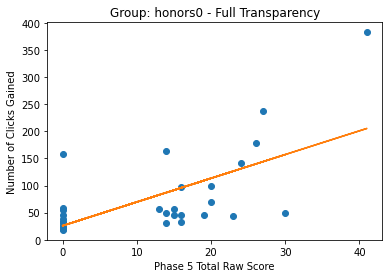

In [226]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 5 Total Raw Score')
plt.ylabel('Number of Clicks Gained')
plt.title('Group: honors0 - Full Transparency')

In [227]:
# Empty List because UNAL0 has no transparency 

df_new = df1.loc[df1['hack id'] == 'unal1']
print(df_new['username'].tolist())
#print(df_new)
df_revised = phase1.loc[phase1.clicker_username.isin(df_new['username'])]
df_revised

['evilcucaracha', 'JulianM96', 'cglaitong', 'DaniCastel', 'alejosaur', 'garayf', 'sebcamacho1703', 'xFortich', 'davideperdomo', 'ayperezc']


,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
13122,11/13/17,11:47 PM,NaN,show-view,/users/alejosaur/projects/webapp_phase3/previe...,NaN,phase4,alejosaur,asantamariap@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
13123,11/13/17,11:49 PM,67.781,view-project-time,/users/alejosaur/projects/webapp_phase3,NaN,phase4,alejosaur,asantamariap@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
13124,11/13/17,11:49 PM,NaN,show-view,/users/BrandonAvilanR/projects/webapp_phase3/p...,NaN,phase4,BrandonAvilanR,bsavilanr@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
13125,11/13/17,11:50 PM,NaN,show-view,/users/cglaitong/projects/webapp_phase3/previe...,NaN,phase4,cglaitong,cglaitong@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
13126,11/13/17,11:50 PM,88.703,view-project-time,/users/BrandonAvilanR/projects/webapp_phase3,NaN,phase4,BrandonAvilanR,bsavilanr@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
...,...,...,...,...,...,...,...,...,...,...,...
17692,11/18/17,11:49 PM,NaN,show-view,/users/jdsolanos/projects/webapp_phase4/previe...,NaN,phase4,jdsolanos,jdsolanos@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
17698,11/18/17,11:49 PM,14.275,view-project-time,/users/jdsolanos/projects/webapp_phase4,NaN,phase4,jdsolanos,jdsolanos@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
17699,11/18/17,11:49 PM,NaN,show-view,/users/gahormigag/projects/webapp_phase4/previ...,NaN,phase4,gahormigag,gahormigag@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
17700,11/18/17,11:49 PM,2.925,view-project-time,/users/gahormigag/projects/webapp_phase4,NaN,phase4,gahormigag,gahormigag@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co


# UNAL1 Phase1 Clicks Analysis ( Solution Transparency )

In [228]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

            index  click_times
0   davideperdomo          109
1      DaniCastel           24
2        ayperezc          176
3  sebcamacho1703           68
4       cglaitong           90


In [229]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_raw'])
print(df_cool)

            index  click_times  match
0   davideperdomo          109     43
1      DaniCastel           24     12
2        ayperezc          176     20
3  sebcamacho1703           68     11
4       cglaitong           90     49


Text(0.5, 1.0, 'Group: unal1 - Solution Transparency')

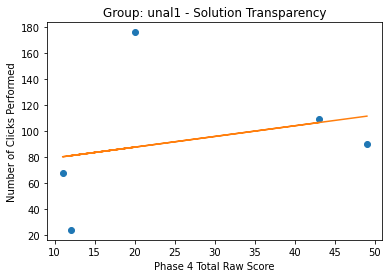

In [231]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 4 Total Raw Score')
plt.ylabel('Number of Clicks Performed')
plt.title('Group: unal1 - Solution Transparency')

In [232]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['hacker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

               index  click_times
0          alejosaur           54
1     BrandonAvilanR           80
2          cglaitong           13
3      evilcucaracha           28
4          JulianM96            5
5         DaniCastel           17
6             garayf           20
7           jaleonro           15
8          Caadiazsi           20
9         facuellarg           17
10          Gusgal03           11
11    sebcamacho1703           28
12          ayperezc           20
13       jaasuarezvi           14
14         nikolasto           13
15       Juankmilo97            9
16        Biopeligro           11
17         alebautis           14
18        gahormigag            9
19         Saariasba            9
20          xFortich           10
21         jdsolanos           10
22       sarguellesr           12
23    DavidsMartinez            4
24     davideperdomo            6
25  JamerMejiaGarcia           11
26         uxjudges1            7


In [233]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_raw'])
print(df_cool)

               index  click_times  match
0          alejosaur           54   43.0
1     BrandonAvilanR           80    NaN
2          cglaitong           13   49.0
3      evilcucaracha           28   18.0
4          JulianM96            5   18.0
5         DaniCastel           17   12.0
6             garayf           20   18.0
7           jaleonro           15    NaN
8          Caadiazsi           20    NaN
9         facuellarg           17    NaN
10          Gusgal03           11    NaN
11    sebcamacho1703           28   11.0
12          ayperezc           20   20.0
13       jaasuarezvi           14    NaN
14         nikolasto           13    NaN
15       Juankmilo97            9    NaN
16        Biopeligro           11    NaN
17         alebautis           14    NaN
18        gahormigag            9    NaN
19         Saariasba            9    NaN
20          xFortich           10   19.0
21         jdsolanos           10    NaN
22       sarguellesr           12    NaN
23    DavidsMart

In [234]:
# Empty List because UNAL0 has no transparency 

df_new = df1.loc[df1['hack id'] == 'unal2']
print(df_new['username'].tolist())
#print(df_new)
df_revised = phase1.loc[phase1.clicker_username.isin(df_new['username'])]
df_revised

['anferoar96', 'trickyjuggler', 'casc3798', 'jsalcinar', 'Anvido', 'Jufcardenasmo', 'federgolo', 'diefrodriguezcha', 'pahigueraf']


,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
13101,11/13/17,11:42 PM,NaN,score-click,NaN,NaN,phase4,pahigueraf,pahigueraf@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
13102,11/13/17,11:43 PM,NaN,score-click,NaN,NaN,phase4,casc3798,caasanchezcr@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
13108,11/13/17,11:43 PM,NaN,score-click,NaN,NaN,phase4,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co
13109,11/13/17,11:43 PM,NaN,score-click,NaN,NaN,phase4,trickyjuggler,ejjimenezc@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
13111,11/13/17,11:43 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase4,Anvido,andrezo0896@gmail.com,pahigueraf,pahigueraf@unal.edu.co
...,...,...,...,...,...,...,...,...,...,...,...
17729,11/18/17,11:53 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase4,diefrodriguezcha,diefrodriguezcha@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
17730,11/18/17,11:53 PM,NaN,show-code,/users/diefrodriguezcha/projects/webapp_phase4...,NaN,phase4,diefrodriguezcha,diefrodriguezcha@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
17731,11/18/17,11:53 PM,NaN,open-file,http://www.ironhacks.com/users/diefrodriguezch...,index.html,phase4,diefrodriguezcha,diefrodriguezcha@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co
17732,11/18/17,11:53 PM,NaN,open-file,http://www.ironhacks.com/users/diefrodriguezch...,index.js,phase4,diefrodriguezcha,diefrodriguezcha@unal.edu.co,pahigueraf,pahigueraf@unal.edu.co


# UNAL2 Phase1 Clicks Analysis ( Full Transparency )

In [235]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['hacker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool) 

               index  click_times
0         pahigueraf          103
1           casc3798           20
2             Anvido          114
3      trickyjuggler           62
4         anferoar96           49
5          jsalcinar           33
6         dahrojasca           26
7            bsdiaza           26
8          federgolo           26
9         csalfonsol           30
10         serbatero           16
11     Jufcardenasmo           22
12       StevenEsmar           25
13         jdgaitanf           32
14  diefrodriguezcha           41
15       adcorredorm           23
16          gimg1859           15
17      RafaelCruz15           10
18       FredyRosero           14
19        buendiagon           19
20        jssanchezo           16
21       dcastanedar           14
22       jannMorenoJ           15
23      DaveValencia           10
24          tres-xxx           25
25       GabrielUnal           14
26     ironhacktech2           13
27         DSFarfanF           17


In [236]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_raw'])
print(df_cool)

               index  click_times  match
0         pahigueraf          103   44.0
1           casc3798           20   12.0
2             Anvido          114   35.0
3      trickyjuggler           62   24.0
4         anferoar96           49   16.0
5          jsalcinar           33   24.0
6         dahrojasca           26    NaN
7            bsdiaza           26    NaN
8          federgolo           26   22.0
9         csalfonsol           30    NaN
10         serbatero           16    NaN
11     Jufcardenasmo           22   11.0
12       StevenEsmar           25    NaN
13         jdgaitanf           32    NaN
14  diefrodriguezcha           41   54.0
15       adcorredorm           23    NaN
16          gimg1859           15    NaN
17      RafaelCruz15           10    NaN
18       FredyRosero           14    NaN
19        buendiagon           19    NaN
20        jssanchezo           16    NaN
21       dcastanedar           14    NaN
22       jannMorenoJ           15    NaN
23      DaveVale

LinAlgError: SVD did not converge in Linear Least Squares

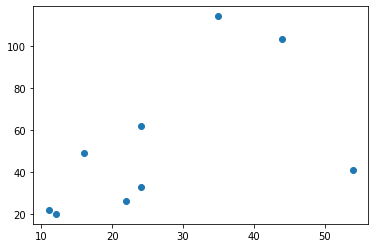

In [237]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 5 Total Raw Score')
plt.ylabel('Number of Clicks Performed')
plt.title('Group: honors0 - Full Transparency')

In [238]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1


df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
df_cool = df_result.reset_index().melt('index',value_name='click_times').drop('variable', axis=1)
print(df_cool)

              index  click_times
0        pahigueraf          489
1     trickyjuggler           39
2            Anvido          119
3  diefrodriguezcha           99
4        anferoar96           67
5         federgolo           17


In [239]:
df_cool['match'] = df_cool['index'].map(df_new.set_index('username')['total_raw'])
print(df_cool)

              index  click_times  match
0        pahigueraf          489     44
1     trickyjuggler           39     24
2            Anvido          119     35
3  diefrodriguezcha           99     54
4        anferoar96           67     16
5         federgolo           17     22


Text(0.5, 1.0, 'Group: unal2 - Full Transparency')

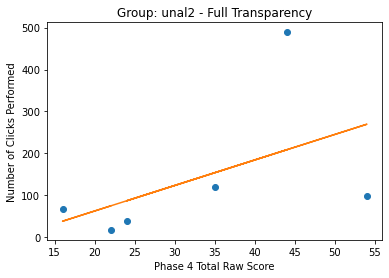

In [242]:
plt.plot(df_cool['match'], df_cool['click_times'], 'o')
m, b = np.polyfit(df_cool['match'], df_cool['click_times'], 1)
plt.plot(df_cool['match'], m*df_cool['match'] + b)
plt.xlabel('Phase 4 Total Raw Score')
plt.ylabel('Number of Clicks Performed')
plt.title('Group: unal2 - Full Transparency')

# Phase 2 Clicks Analysis for honors0 ( Full Transparency ), Unal1 ( Solution Transparency ), Unal2 ( Full Transparency )

In [43]:
phase2 = G_df.loc[G_df['phase'] == 'phase2']
phase2

,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
5775,11/6/17,12:00 PM,NaN,score-click,NaN,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
5778,11/6/17,12:00 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
5780,11/6/17,12:00 PM,NaN,show-view,/users/Jordan-Loeser/projects/webapp_phase1/pr...,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
5781,11/6/17,12:00 PM,NaN,show-code,/users/Jordan-Loeser/projects/webapp_phase1/ed...,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
5782,11/6/17,12:00 PM,NaN,open-file,http://www.ironhacks.com/users/Jordan-Loeser/p...,index.html,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
...,...,...,...,...,...,...,...,...,...,...,...
11734,11/11/17,3:15 PM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,info.js,phase2,Anvido,andrezo0896@gmail.com,anferoar96,afromana@unal.edu.co
11735,11/11/17,3:15 PM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,info.js,phase2,Anvido,andrezo0896@gmail.com,anferoar96,afromana@unal.edu.co
11736,11/11/17,3:15 PM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,map.js,phase2,Anvido,andrezo0896@gmail.com,anferoar96,afromana@unal.edu.co
11737,11/11/17,3:15 PM,NaN,open-file,http://www.ironhacks.com/users/Anvido/projects...,info.js,phase2,Anvido,andrezo0896@gmail.com,anferoar96,afromana@unal.edu.co


In [60]:
df_new = df1.loc[df1['hack id'] == 'honors0']
print(df_new['username'].tolist())
#print(df_new)
df_revised = phase2.loc[phase2.clicker_username.isin(df_new['username'])]
df_revised

['mdecloedt', 'Jordan-Loeser', 'LukasMMarinovic', 'whipplem123', 'jmamaril25', 'viswapurdue', 'CampbellC2', 'noah-curran', 'bzin22', 'AkaGar', 'matson3', 'ecottle', 'littlex2015', 'sanjitsama', 'hihms', 'snugghash', 'zhao744', 'ko68', 'GeoffYart', 'gshowal']


,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
5775,11/6/17,12:00 PM,NaN,score-click,NaN,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
5778,11/6/17,12:00 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
5780,11/6/17,12:00 PM,NaN,show-view,/users/Jordan-Loeser/projects/webapp_phase1/pr...,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
5781,11/6/17,12:00 PM,NaN,show-code,/users/Jordan-Loeser/projects/webapp_phase1/ed...,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
5782,11/6/17,12:00 PM,NaN,open-file,http://www.ironhacks.com/users/Jordan-Loeser/p...,index.html,phase2,Jordan-Loeser,jordlo@comcast.net,zhao744,zhao744@purdue.edu
...,...,...,...,...,...,...,...,...,...,...,...
11722,11/11/17,2:55 PM,4.432,view-project-time,/users/Jordan-Loeser/projects/webapp_phase2,NaN,phase2,Jordan-Loeser,jordlo@comcast.net,Jordan-Loeser,jordlo@comcast.net
11723,11/11/17,2:57 PM,NaN,show-view,/users/jmamaril25/projects/webapp_phase2/previ...,NaN,phase2,jmamaril25,jmamaril25@gmail.com,bzin22,bryanzin7@gmail.com
11724,11/11/17,2:57 PM,NaN,show-code,/users/jmamaril25/projects/webapp_phase2/edit?...,NaN,phase2,jmamaril25,jmamaril25@gmail.com,bzin22,bryanzin7@gmail.com
11725,11/11/17,2:57 PM,NaN,open-file,http://www.ironhacks.com/users/jmamaril25/proj...,index.html,phase2,jmamaril25,jmamaril25@gmail.com,bzin22,bryanzin7@gmail.com


# Phase 2 Honors0 - Clicks Analysis ( Full Transparency ) 

In [61]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['hacker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1

print(wordfreq)

{'Jordan-Loeser': 100, 'jmamaril25': 161, 'SionHu': 10, 'ko68': 156, 'whipplem123': 26, 'LukasMMarinovic': 48, 'zhao744': 100, 'aclipfel': 7, 'lennwgs': 51, 'mdecloedt': 73, 'hihms': 100, 'bzin22': 28, 'matson3': 34, 'CampbellC2': 69, 'laurenjank': 59, 'AkaGar': 17, 'GeoffYart': 73, 'littlex2015': 47, 'nbraunec': 15, 'laurarotger': 13, 'jmhunter4711': 12, 'Ilyumzhinov': 6, 'snugghash': 18, 'shivans': 12, 'noah-curran': 39, 'viswapurdue': 78, 'sanjitsama': 15, 'ecottle': 18}


In [62]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1

df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
print(df_result)

                 0
zhao744         92
bzin22          70
jmamaril25      83
gshowal        114
CampbellC2       2
mdecloedt      509
viswapurdue    106
littlex2015     62
ko68            94
matson3        131
GeoffYart       62
ecottle         25
Jordan-Loeser   30
whipplem123      5


In [47]:
df_new = df1.loc[df1['hack id'] == 'unal1']
print(df_new['username'].tolist())
#print(df_new)
df_revised = phase2.loc[phase2.clicker_username.isin(df_new['username'])]
df_revised

['JulianM96', 'cglaitong', 'DaniCastel', 'alejosaur', 'jdsolanos', 'garayf', 'sebcamacho1703', 'xFortich', 'Juankmilo97', 'davideperdomo']


,click_date,click_time,time_open,event_type,url,file_path,phase,hacker_username,hacker_email,clicker_username,clicker_email
8897,11/8/17,11:24 PM,NaN,show-view,/users/davideperdomo/projects/webapp_phase2/pr...,NaN,phase2,davideperdomo,daeperdomocr@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
8898,11/8/17,11:24 PM,10.786,view-project-time,/users/davideperdomo/projects/webapp_phase2,NaN,phase2,davideperdomo,daeperdomocr@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
8899,11/8/17,11:24 PM,NaN,show-view,/users/evilcucaracha/projects/webapp_phase2/pr...,NaN,phase2,evilcucaracha,rcbuelvasv@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
8900,11/8/17,11:25 PM,20.970,view-project-time,/users/evilcucaracha/projects/webapp_phase2,NaN,phase2,evilcucaracha,rcbuelvasv@unal.edu.co,davideperdomo,daeperdomocr@unal.edu.co
8929,11/8/17,11:33 PM,NaN,click-project-url,http://www.ironhacks.com/view-project/f09deadf...,NaN,phase2,uxjudges3,uxjudges3@gmail.com,davideperdomo,daeperdomocr@unal.edu.co
...,...,...,...,...,...,...,...,...,...,...,...
11424,11/11/17,11:54 AM,4.330,view-project-time,/users/jaasuarezvi/projects/webapp_phase2,NaN,phase2,jaasuarezvi,andres4005@gmail.com,xFortich,ajsuarezf@unal.edu.co
11425,11/11/17,11:54 AM,NaN,show-view,/users/Biopeligro/projects/webapp_phase2/previ...,NaN,phase2,Biopeligro,gebaezs@unal.edu.co,xFortich,ajsuarezf@unal.edu.co
11426,11/11/17,11:54 AM,2.176,view-project-time,/users/Biopeligro/projects/webapp_phase2,NaN,phase2,Biopeligro,gebaezs@unal.edu.co,xFortich,ajsuarezf@unal.edu.co
11427,11/11/17,11:54 AM,NaN,show-view,/users/alejosaur/projects/webapp_phase2/previe...,NaN,phase2,alejosaur,asantamariap@unal.edu.co,xFortich,ajsuarezf@unal.edu.co


# Phase 2 Unal1 Clicks Analysis ( Solution Transparency )

In [57]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['hacker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1

df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
print(df_result)

                   0
davideperdomo      4
evilcucaracha      9
uxjudges3          7
cglaitong          5
BrandonAvilanR    84
alejosaur         33
garayf             7
JulianM96          8
DaniCastel         8
Saariasba          2
Biopeligro         7
jaleonro           2
Caadiazsi          2
facuellarg         7
uxjudges1          5
jdsolanos          8
nikolasto          8
DavidsMartinez     2
sebcamacho1703     2
Juankmilo97        2
jaasuarezvi        4
ayperezc           3
alebautis          3
JamerMejiaGarcia   6
Gusgal03           8
xFortich           2


In [56]:
G5 = nx.from_pandas_edgelist(df_revised, 'hacker_username', 'clicker_username')

matching = df_revised['clicker_username'].tolist()
count = 0

wordfreq = {}
for raw_word in matching:
    if raw_word not in wordfreq:
        wordfreq[raw_word] = 0 
    wordfreq[raw_word] += 1

df_result = pd.DataFrame.from_dict(wordfreq, orient='index')
print(df_result)

                 0
davideperdomo  161
DaniCastel      33
xFortich        29
alejosaur       15
